In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


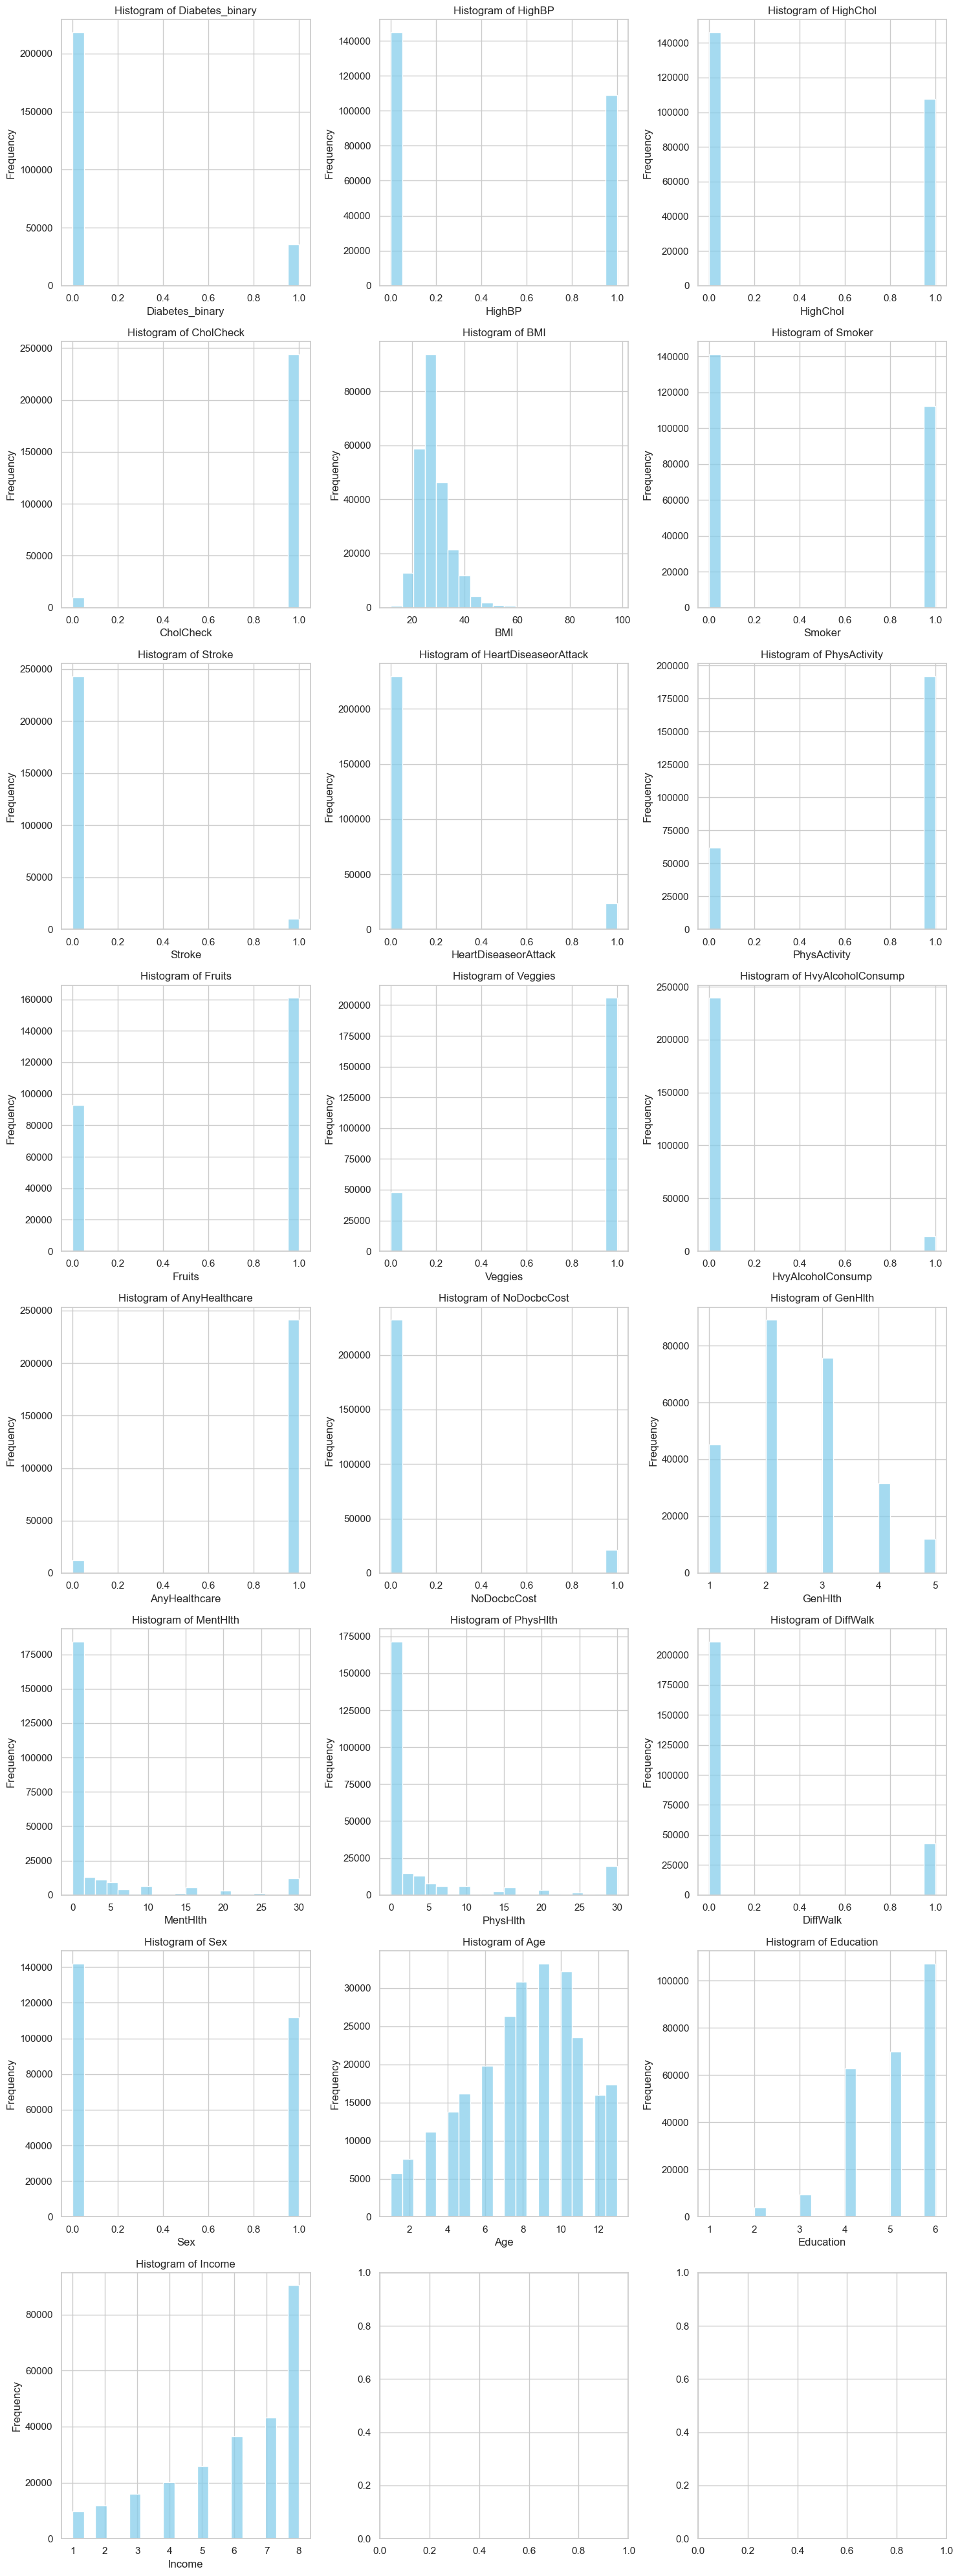

In [ ]:
%matplotlib inline

plt.rcParams.update({'font.family':'Arial'})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2
plt.rcParams.update({'font.size':11})

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Set the style of seaborn
sns.set(style="whitegrid")

# Get the num of features
num_features = len(df.columns)

# Set the number of columns in the grid
num_cols = 3

# Calc number of rows needed
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each feature
for i, column in enumerate(df.columns):
    # Create distribution histogram
    sns.histplot(df[column], bins=20, kde=False, color='skyblue', ax=axes[i])  # Adjust the number of bins and color
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('histograms_grid.png')
plt.show()




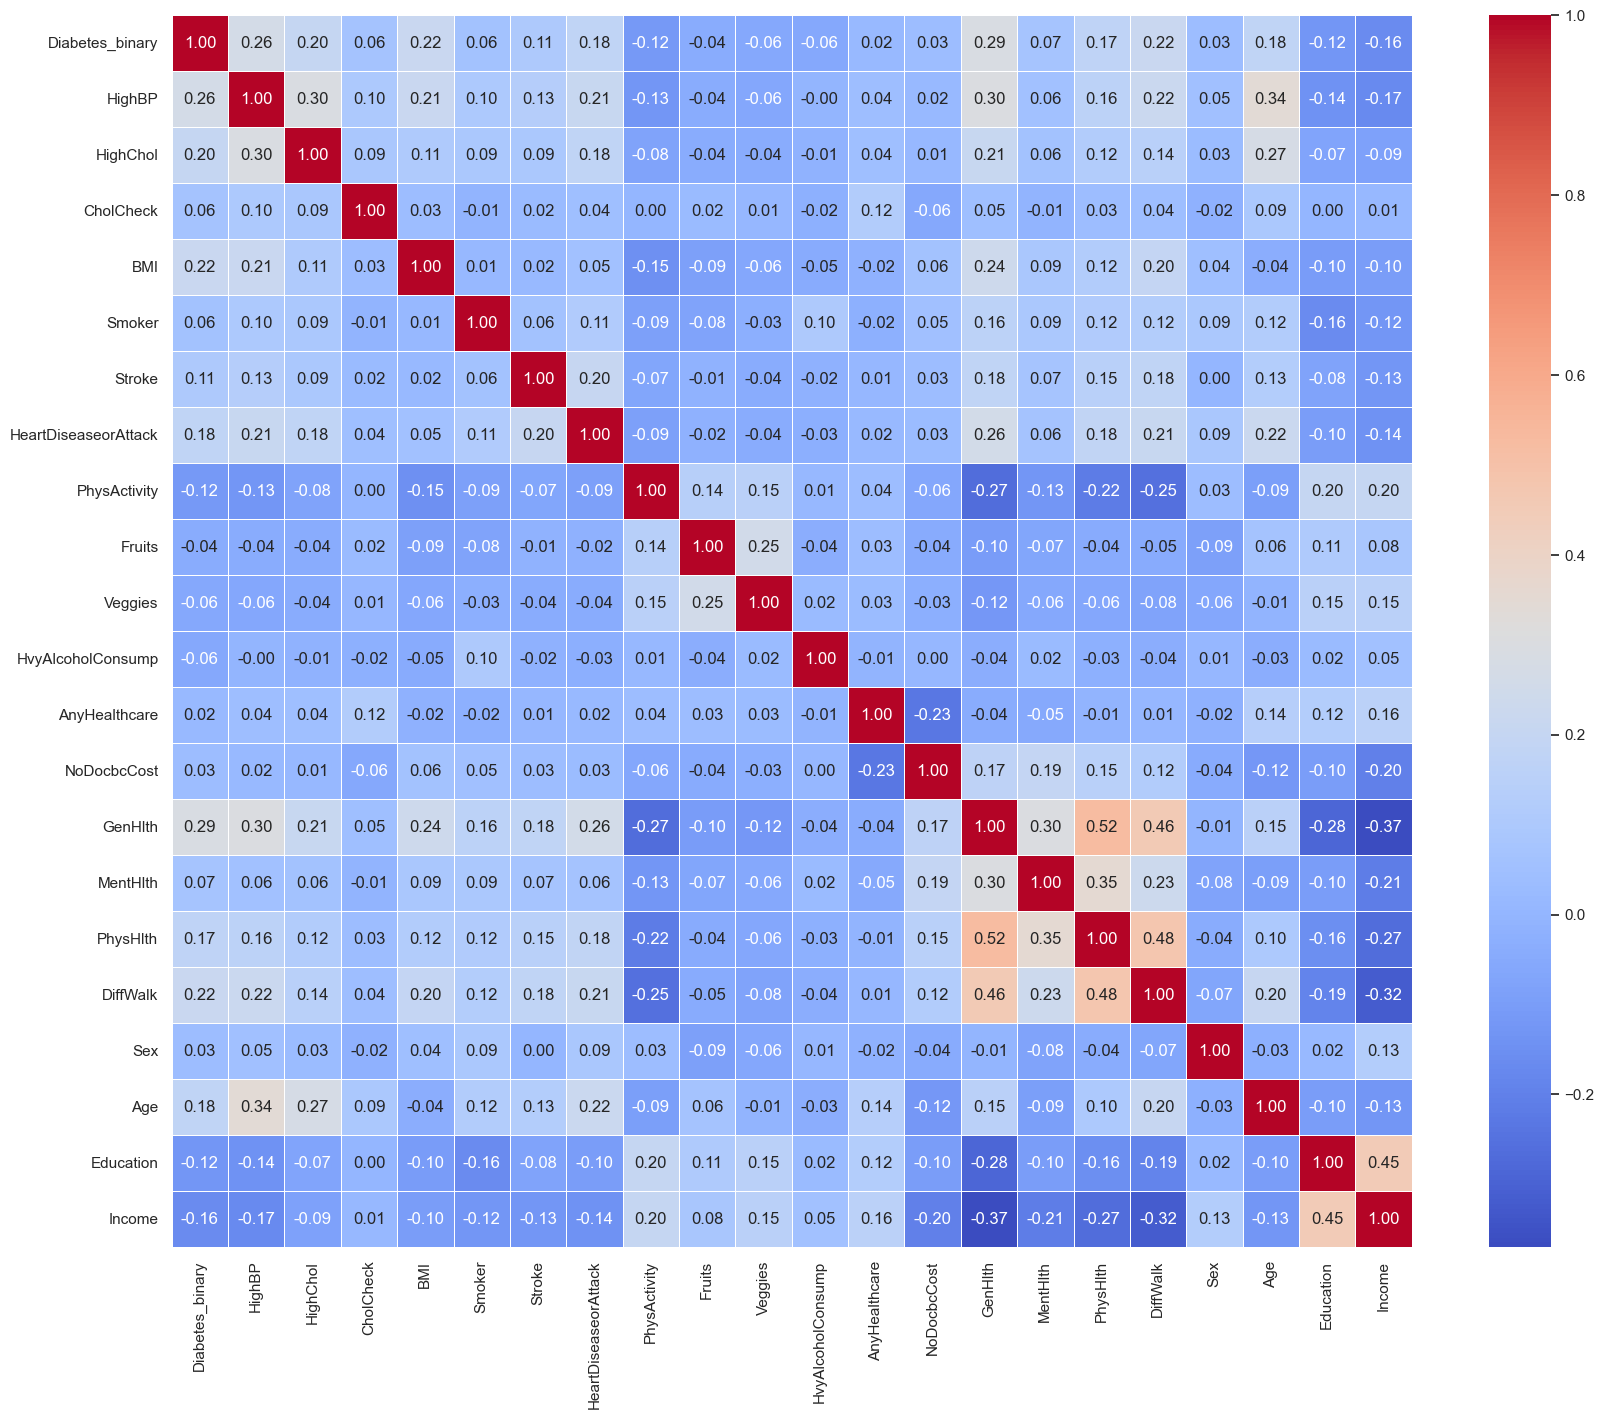

In [ ]:
# Calc the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))

# Create seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

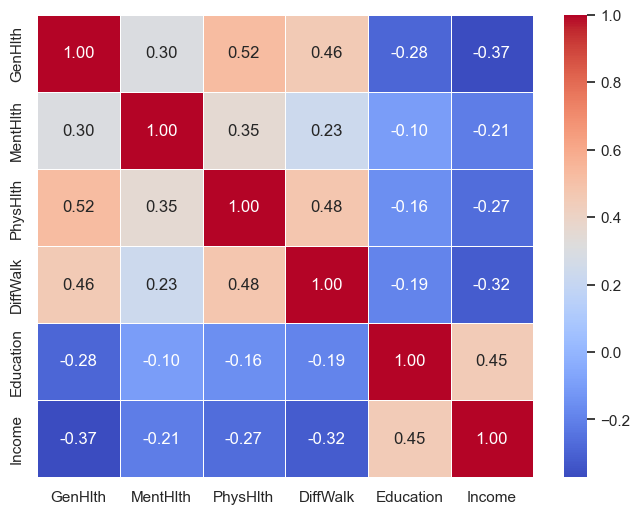

In [4]:
# Create smaller correlation matrix plot

# Get subset of relevant features
selected_columns = ['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income']
subset_data = df[selected_columns]

# Calc the correlation matrix
correlation_matrix = subset_data.corr()
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.get_figure().savefig('subset_correlation_matrix.png', bbox_inches='tight')
plt.show()


In [ ]:
# The models below use the dataset provided with only binary classificaiton
# No preprocessing has been done the dataset as of this point

In [5]:
# Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8626222011983601
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43671
         1.0       0.52      0.15      0.24      7065

    accuracy                           0.86     50736
   macro avg       0.70      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



In [6]:
# KNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set k value here
k_value = 5 
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.8475638599810785
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     43671
         1.0       0.41      0.21      0.27      7065

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



In [7]:
# Ensemble Tree method from class

from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = 100

models = [DecisionTreeClassifier(max_depth=3),\
BaggingClassifier(n_estimators=n_estimators),\
RandomForestClassifier(n_estimators=n_estimators),\
ExtraTreesClassifier(n_estimators=n_estimators),\
AdaBoostClassifier(n_estimators=n_estimators)]

model_titles = ['DecisionTree', 'Bagging', 'RandomForest', 'ExtraTrees', 'AdaBoost']

surv_preds, surv_probs, scores, fprs, tprs = ([] for i in range(5))

for i, model in enumerate(models):
    clf = model.fit(X_train,y_train)
    surv_preds.append(model.predict(X_test))
    surv_probs.append(model.predict_proba(X_test))
    scores.append(model.score(X_test, y_test))
    fpr, tpr, _ = roc_curve(y_test, surv_probs[i][:,1])
    fprs.append(fpr)
    tprs.append(tpr)

In [8]:
for i, score in enumerate(scores):
    print("{0} with score {1:0.2f}".format(model_titles[i], score))

DecisionTree with score 0.86
Bagging with score 0.85
RandomForest with score 0.86
ExtraTrees with score 0.85
AdaBoost with score 0.87


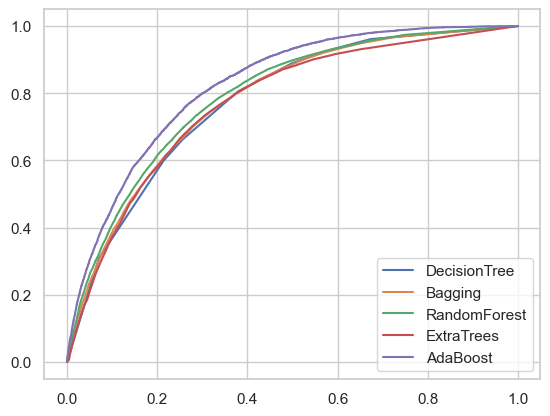

In [9]:
import matplotlib.pyplot as plt

for i, _ in enumerate(models):
    plt.plot(fprs[i],tprs[i])

plt.legend(model_titles)
plt.show()